# Project on Amazon Food Reviews

This project focuses on analyzing Amazon food reviews. The dataset is taken from the following link: [Amazon Fine Food Reviews](https://snap.stanford.edu/data/web-FineFoods.html).

The dataset consists of reviews of fine foods from Amazon. The data spans a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review.




## Loading and Processing Review Data from a .txt.gz File

Firstly, we will:

1. Load a compressed text file (`.txt.gz`) using Python's `gzip` library.
2. Inspect the file content to understand the data structure.
3. Dynamically read and process the text file to extract review data.
4. Store the extracted data in a pandas DataFrame for analysis.
5. Save the DataFrame as a CSV file.



## Step 1: Import Necessary Libraries

## Step 2: Load the Compressed File

We will use the `gzip` library to open the compressed file. 


In [1]:
import gzip
import pandas as pd
import os

# Define file paths
file_path = r"D:\Final Project\finefoods.txt.gz"
directory_path = r"D:\Final Project"


D:\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Open the gzip file in read mode with text format
with gzip.open(file_path, 'rt', encoding='ISO-8859-1') as file:
    # Read all lines in the file
    data = file.readlines()


## Step 3: Display Sample Data

We will display a sample of the data to understand its structure. This will help us see why we need to initialize empty lists for each field.


In [3]:
# Display the sample data
for line in data[:20]:  # Display only the first 20 lines for brevity
    print(line.strip())


product/productId: B001E4KFG0
review/userId: A3SGXH7AUHU8GW
review/profileName: delmartian
review/helpfulness: 1/1
review/score: 5.0
review/time: 1303862400
review/summary: Good Quality Dog Food
review/text: I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.

product/productId: B00813GRG4
review/userId: A1D87F6ZCVE5NK
review/profileName: dll pa
review/helpfulness: 0/0
review/score: 1.0
review/time: 1346976000
review/summary: Not as Advertised
review/text: Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".

product/productId: B000LQOCH0
review/userId: ABXLMWJIXXAIN


## Step 4: Read and Extract Data

The data is now loaded into a list of strings, where each string represents a line in the file. We will dynamically extract the required information and store it in lists.


In [4]:
# Initialize empty lists to store the extracted data
ProductId = []
UserId = []
Profilename = []
HelpfulnessNumerator = []
HelpfulnessDenominator = []
Score = []
Time = []
ReviewSummary = []
ReviewText = []

# Parse the data
for line in data:
    line = line.strip()  # Remove leading and trailing whitespace
    if line.startswith("product/productId:"):
        ProductId.append(line.split(': ')[1].strip())
    elif line.startswith("review/userId:"):
        UserId.append(line.split(': ')[1].strip())
    elif line.startswith("review/profileName:"):
        Profilename.append(line.split(': ')[1].strip())
    elif line.startswith("review/helpfulness:"):
        helpfulness = line.split(': ')[1].strip().split('/')
        HelpfulnessNumerator.append(helpfulness[0])
        HelpfulnessDenominator.append(helpfulness[1])
    elif line.startswith("review/score:"):
        Score.append(line.split(': ')[1].strip())
    elif line.startswith("review/time:"):
        Time.append(line.split(': ')[1].strip())
    elif line.startswith("review/summary:"):
        ReviewSummary.append(line.split(': ')[1].strip())
    elif line.startswith("review/text:"):
        ReviewText.append(line.split(': ')[1].strip())


## Step 5: Create DataFrame

We will store the extracted data in a pandas DataFrame.


In [5]:
# Create the DataFrame
df = pd.DataFrame({
    "ProductId": ProductId,
    "UserId": UserId,
    "Profilename": Profilename,
    "HelpfulnessNumerator": HelpfulnessNumerator,
    "HelpfulnessDenominator": HelpfulnessDenominator,
    "Score": Score,
    "Time": Time,
    "ReviewSummary": ReviewSummary,
    "ReviewText": ReviewText
})


## Step 6: Display Data

We will display the first few rows of the DataFrame to verify the data extraction process.


In [6]:
# Display the first 5 rows of the DataFrame
df.head(5)


,ProductId,UserId,Profilename,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## Step 7: Save DataFrame as CSV

We will save the DataFrame to a CSV file in the specified directory.


In [7]:
# Define the output CSV file path
output_csv_path = os.path.join(directory_path, "finefoods_reviews.csv")

# Save the DataFrame to a CSV file
df.to_csv(output_csv_path, index=False)




## Conclusion

In this notebook, we have successfully loaded a compressed text file (`.txt.gz`) using Python's `gzip` library, displayed a sample of the data to understand its structure, read and extracted the review data, stored the data in a pandas DataFrame, and saved the DataFrame as a CSV file. This approach provides a comprehensive method for processing and analyzing text data from compressed files and storing the results for further use.


# Importing Libraries for Data Analysis
Now we will import necessary libraries for data analysis and visualization.


In [8]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import re


## Step 8: Loading the Data for Analysis

Load the data from the CSV file we saved earlier.


In [9]:
# Load the data
data = pd.read_csv(output_csv_path)
data.head()


,ProductId,UserId,Profilename,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5.0,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1.0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4.0,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2.0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5.0,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [10]:
data['ReviewText'][1]

'Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo".'

## Step 9: Data Exploration
Explore the basic structure and statistics of the data.

In [11]:
! pip install skimpy

In [12]:
from skimpy import skim

skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 568454 │ │ string      │ 5     │                                                          │
│ │ Number of columns │ 9      │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━┳━━━━┳━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_n ┃    ┃      ┃          ┃          ┃          ┃          ┃          ┃          ┃          ┃        ┃  │
│ ┃ ame      ┃ NA ┃ NA % ┃ mean     ┃ sd       ┃ p0       ┃ p25      ┃ p50      ┃ p75      ┃ p100     ┃ hist   ┃  │
│ ┡━━━━━━━━━━╇━━━━╇━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━━━╇━━━━━━━━┩  │
│ │ Helpfuln │  0 │    0 │    1.744 │    7.637 │        0 │        0 │        0 │        2 │      866 │   ▇    │  │
│ │ essNumer │    │      │          │          │          │          │          │          │          │        │  │
│ │ ator     │    │      │          │          │          │          │          │          │          │        │  │
│ │ Helpfuln │  0 │    0 │    2.229 │     8.29 │        0 │        0 │        1 │        2 │      923 │   ▇    │  │
│ │ essDenom │    │      │          │          │          │          │          │          │          │        │  │
│ │ inator   │    │      │          │          │          │          │          │          │          │        │  │
│ │ Score    │  0 │    0 │    4.183 │     1.31 │        1 │        4 │        5 │        5 │        5 │ ▁▁ ▁▂▇ │  │
│ │ Time     │  0 │    0 │ 12960000 │ 48040000 │ 93930000 │ 12710000 │ 13110000 │ 13330000 │ 13510000 │    ▁▂▇ │  │
│ │          │    │      │       00 │          │        0 │       00 │       00 │       00 │       00 │        │  │
│ └──────────┴────┴──────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴──────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                  ┃ NA     ┃ NA %       ┃ words per row               ┃ total words             ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ ProductId                    │      0 │          0 │                           1 │                  568454 │  │
│ │ UserId                       │      0 │          0 │                           1 │                  568454 │  │
│ │ Profilename                  │     27 │          0 │                         2.2 │                 1271504 │  │
│ │ ReviewSummary                │     27 │          0 │                         4.1 │                 2338347 │  │
│ │ ReviewText                   │      0 │          0 │                          77 │                43753935 │  │
│ └──────────────────────────────┴────────┴────────────┴─────────────────────────────┴─────────────────────────┘  │
╰────────────────────────────────────────────────────── 

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 9 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ProductId               568454 non-null  object 
 1   UserId                  568454 non-null  object 
 2   Profilename             568427 non-null  object 
 3   HelpfulnessNumerator    568454 non-null  int64  
 4   HelpfulnessDenominator  568454 non-null  int64  
 5   Score                   568454 non-null  float64
 6   Time                    568454 non-null  int64  
 7   ReviewSummary           568427 non-null  object 
 8   ReviewText              568454 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 39.0+ MB


In [14]:
data.dtypes

ProductId                  object
UserId                     object
Profilename                object
HelpfulnessNumerator        int64
HelpfulnessDenominator      int64
Score                     float64
Time                        int64
ReviewSummary              object
ReviewText                 object
dtype: object

# Step 10: Converting the Data

We will convert columns to appropriate data types.


In [15]:
# Copy the data 
data1 = data.copy()

# Convert columns to appropriate data types
data1["Score"] = pd.to_numeric(data1["Score"], errors='coerce').astype(float).astype(int)
data1["HelpfulnessNumerator"] = pd.to_numeric(data1["HelpfulnessNumerator"], errors='coerce').astype(int)
data1["HelpfulnessDenominator"] = pd.to_numeric(data1["HelpfulnessDenominator"], errors='coerce').astype(int)
data1["Time"] = pd.to_numeric(data1["Time"], errors='coerce').astype(int)

# Check the cleaned data
data1.head()

,ProductId,UserId,Profilename,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [16]:
data1.dtypes


ProductId                 object
UserId                    object
Profilename               object
HelpfulnessNumerator       int32
HelpfulnessDenominator     int32
Score                      int32
Time                       int32
ReviewSummary             object
ReviewText                object
dtype: object

## Finding the numeric and Category columns in data Frame

In [17]:
category=data1.select_dtypes("object")
column_names = category.columns.tolist()
column_names


['ProductId', 'UserId', 'Profilename', 'ReviewSummary', 'ReviewText']

In [18]:
numeric=data1.select_dtypes("number")
column_names=numeric.columns.tolist()
column_names


['HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time']

## Step 11: Calculate Helpfulness Percentage
We will calculate the helpfulness percentage for each review and clean up the data.

In [19]:
# Calculate the helpfulness percentage
data1["Helpfulness"] = (data1["HelpfulnessNumerator"] / data1["HelpfulnessDenominator"]) * 100

# Fill missing values with 0
data1["Helpfulness"] = data1["Helpfulness"].fillna(0)

# Round the helpfulness percentage and convert to integer
data1["Helpfulness"] = data1["Helpfulness"].round().astype(int)

# Display the first few rows to check the new column
data1.head()


,ProductId,UserId,Profilename,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,ReviewSummary,ReviewText,Helpfulness
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,100
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,100
3,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,100
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0


### Step 11.1: Cleaning Up Data

We will drop unnecessary columns such as `HelpfulnessNumerator` and `HelpfulnessDenominator`. Additionally, we will remove any duplicate rows to ensure the dataset is clean.


In [20]:
# Drop unnecessary columns
columns_to_drop = ["HelpfulnessNumerator", "HelpfulnessDenominator"]
data1 = data1.drop(columns=columns_to_drop)

# Drop duplicate rows
data1.drop_duplicates(inplace=True)

# Display the cleaned data
data1.head()


,ProductId,UserId,Profilename,Score,Time,ReviewSummary,ReviewText,Helpfulness
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,100
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,100
3,B000UA0QIQ,A395BORC6FGVXV,Karl,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,100
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,0


## Step 12: Extracting Year and Month from Timestamp

We will convert the 'Time' column to datetime format, extract the year and month, and then drop the 'Time' column as it's no longer needed.


In [21]:
# Convert 'Time' column to datetime format
data1["Time"] = data1["Time"].astype("int")

# Extract year from the timestamp
from datetime import datetime
data1["Year"] = data1["Time"].apply(lambda x: datetime.utcfromtimestamp(x).year)

# Extract month from the timestamp
data1["Month"] = data1["Time"].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%B'))

# Drop the 'Time' column as it's now redundant
data1.drop(columns=["Time"], inplace=True)

# Display the updated DataFrame
data1.head()


,ProductId,UserId,Profilename,Score,ReviewSummary,ReviewText,Helpfulness,Year,Month
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,100,2011,April
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,2012,September
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...,100,2008,August
3,B000UA0QIQ,A395BORC6FGVXV,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...,100,2011,June
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...,0,2012,October


## Step 13: Exploratory Data Analysis
Perform data analysis and visualize the results.

### Step 13.1: Calculate Percentages for Specific Years
We will calculate the percentage of reviews for the years 2006 and 2007.

In [22]:
# Calculate the number of reviews for the years 2006 and 2007
y2006 = len(data1.loc[data1["Year"] == 2006])
y2007 = len(data1.loc[data1["Year"] == 2007])

# Calculate the percentage of reviews for these years
for i in y2006, y2007:
    percentage = ((i * 100) / 500000)
    print(percentage)


1.3326
4.4558


### Step 13.2: Calculate and Display Review Percentages for All Years
We will calculate and display the percentage of reviews for each year from 1999 to 2012.

In [23]:
for year in range(1999, 2013):
    sales_in_year = len(data1.loc[data1["Year"] == year])
    percentage = (sales_in_year * 100) / 568069
    percentage = round(percentage, 3)  # Round the percentage to 3 decimal places
    print(year, "=", percentage)


1999 = 0.001
2000 = 0.006
2001 = 0.002
2002 = 0.013
2003 = 0.023
2004 = 0.099
2005 = 0.235
2006 = 1.173
2007 = 3.922
2008 = 6.01
2009 = 9.731
2010 = 15.103
2011 = 28.726
2012 = 34.96


### Step 13.3: Plot the Difference in Sales Percentage Between Consecutive Years
We will plot the difference in sales percentage between consecutive years.

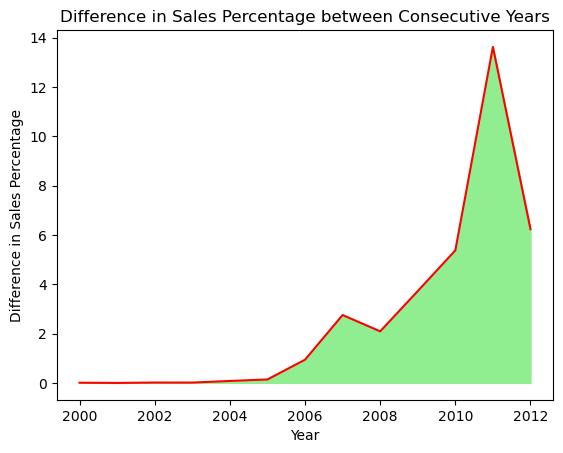

In [24]:
import matplotlib.pyplot as plt

years = range(1999, 2013)
previous_percentage = 0
differences = []

for year in years:
    sales_in_year = len(data1.loc[data1["Year"] == year])
    percentage = (sales_in_year * 100) / 568069
    percentage = round(percentage, 3)  # Round the percentage to 3 decimal places
    
    if previous_percentage != 0:
        difference = percentage - previous_percentage
        differences.append(difference)
    
    previous_percentage = percentage

plt.plot(list(years)[1:], differences, color="red")
plt.xlabel('Year')
plt.ylabel('Difference in Sales Percentage')
plt.title('Difference in Sales Percentage between Consecutive Years')
plt.fill_between(list(years)[1:], differences, color="lightgreen")
plt.show()


## Step 13.4: Filter Reviews Based on Helpfulness and Score
We will filter reviews where helpfulness is 0 and the score is less than or equal to 3.

In [25]:
helpness = data1.loc[(data1["Helpfulness"] == 0) & (data1["Score"] <= 3)]
helpness.head()


,ProductId,UserId,Profilename,Score,ReviewSummary,ReviewText,Helpfulness,Year,Month
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,2012,September
16,B001GVISJM,A3KLWF6WQ5BNYO,Erica Neathery,2,poor taste,I love eating them and they are good for watch...,0,2012,September
26,B001GVISJM,A3RXAU2N8KV45G,lady21,1,Nasty No flavor,"The candy is just red , No flavor . Just plan...",0,2012,March
45,B001EO5QW8,A39Z97950MCTQE,K. A. Freel,3,Hearty Oatmeal,This seems a little more wholesome than some o...,0,2008,March
49,B001EO5QW8,A276999Y6VRSCQ,JMay,3,Same stuff,This is the same stuff you can buy at the big ...,0,2012,April


### Step 13.5: Calculate the Percentage of Reviews with No Helpfulness
We will calculate the percentage of reviews with no helpfulness and a score of less than or equal to 3.

In [26]:
percentage_no_helpfulness = ((len(helpness)) / (len(data1))) * 100
percentage_no_helpfulness


10.315078307494883

Approximately 10% of clients rated the range (0.3) because there is no helpfulness

## Step 13.6: Plot the Distribution of Reviews by Year and Score
We will plot the distribution of reviews by year and score.

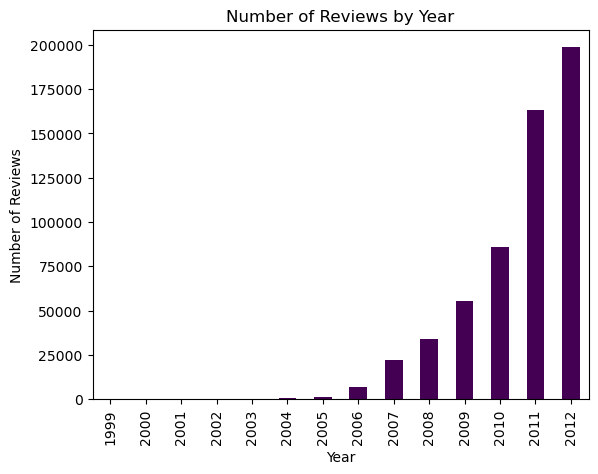

In [27]:
data1.groupby(['Year']).size().plot(kind="bar", colormap='viridis')
plt.title("Number of Reviews by Year")
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.show()


### Step 13.7: Plot the Count of Reviews by Year and Score
We will plot the count of reviews by year and score using seaborn.




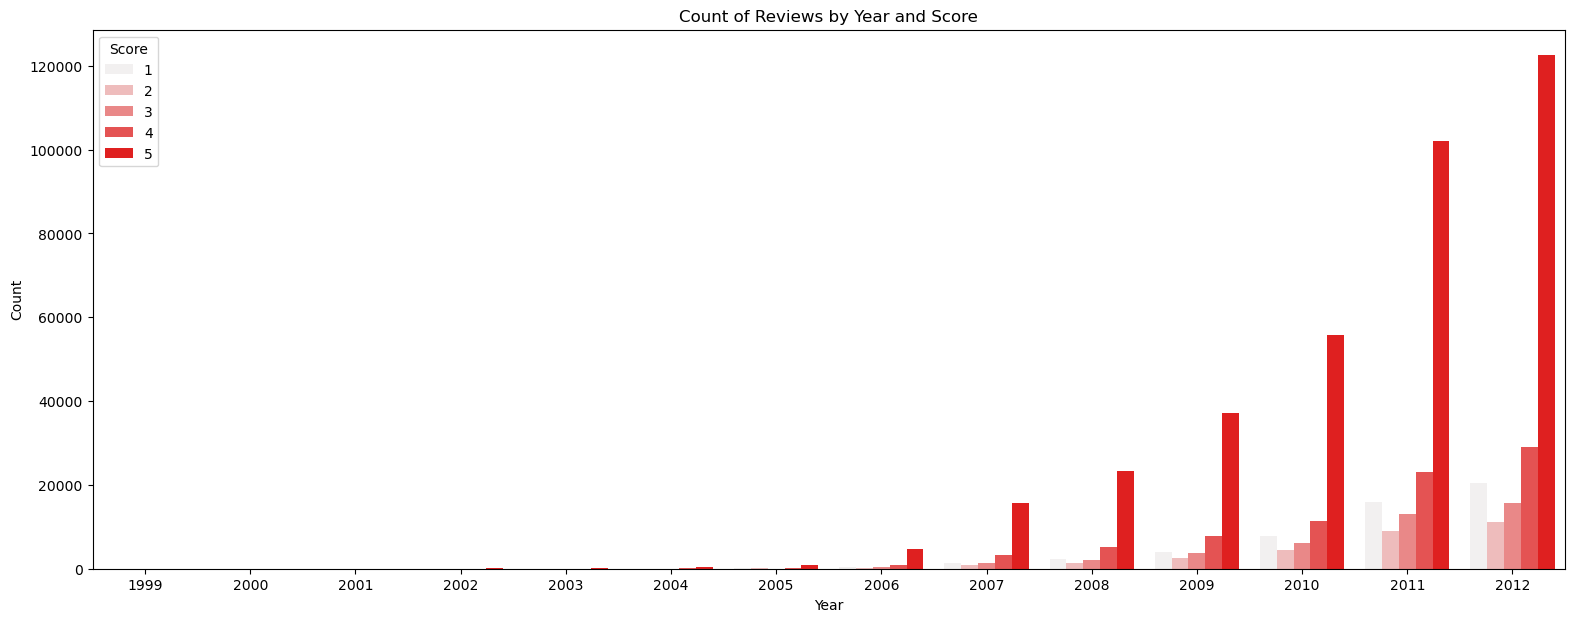

In [28]:
fig = plt.figure(figsize=(19, 7))
sns.countplot(data=data1, x="Year", color="red", hue="Score")
plt.title("Count of Reviews by Year and Score")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


### Step 13.8: Group and Count Reviews by Score
We will group and count the number of reviews by score.

In [29]:
len(data1)
k = data1.groupby("Score")
len(k.get_group(5))


362864

### Step 13.9: Create Customer Rating Column

We will create a new column `Customer_Rating` based on the `Score` column.


In [30]:
data1["Customer_Rating"]=data1["Score"].apply(lambda x: "Excellent" if x == 5 else ("Very Good" if x == 4 else ("Average" if x == 3 else ("Bad" if x <= 2 else x))))
data1["Customer_Rating"]

0         Excellent
1               Bad
2         Very Good
3               Bad
4         Excellent
            ...    
568449    Excellent
568450          Bad
568451    Excellent
568452    Excellent
568453    Excellent
Name: Customer_Rating, Length: 568081, dtype: object

In [31]:
data1.head()



,ProductId,UserId,Profilename,Score,ReviewSummary,ReviewText,Helpfulness,Year,Month,Customer_Rating
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,100,2011,April,Excellent
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,2012,September,Bad
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...,100,2008,August,Very Good
3,B000UA0QIQ,A395BORC6FGVXV,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...,100,2011,June,Bad
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...,0,2012,October,Excellent


### Step 13.10: Top 10 Product IDs by Count

We will find the top 10 product IDs by count and plot them.



In [32]:
top_10_counts = data1["ProductId"].value_counts().head(10)
# Display the top 10 most reviewed products
print(top_10_counts)

ProductId
B007JFMH8M    913
B002QWP8H0    631
B002QWHJOU    631
B0026RQTGE    631
B002QWP89S    631
B003B3OOPA    623
B001EO5Q64    567
B007M832YY    564
B001RVFERK    564
B0026KPDG8    564
Name: count, dtype: int64


In [33]:
data1["ProductId"].dtypes

dtype('O')

<Figure size 640x480 with 0 Axes>

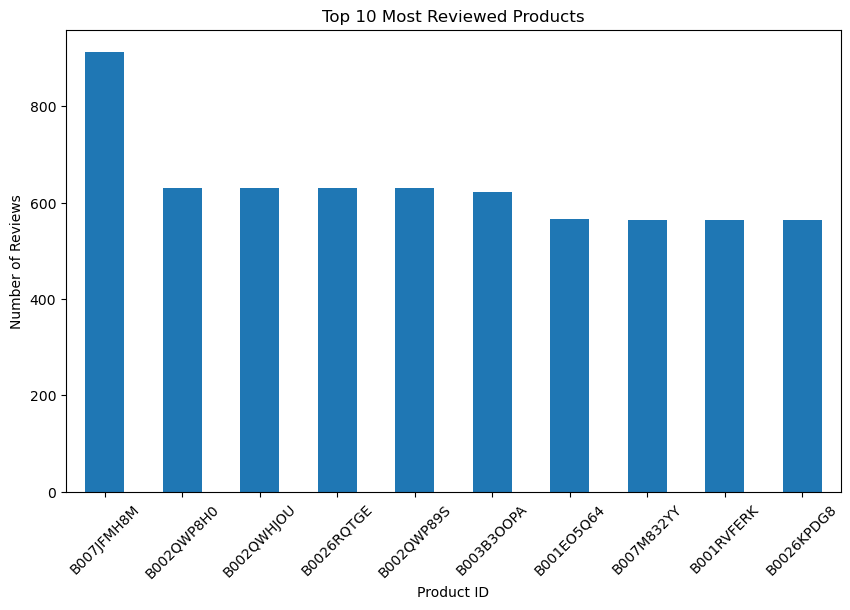

In [34]:
import matplotlib.pyplot as plt

# Ensure the plot is cleared before creating a new one
plt.clf()

# Plot the top 10 most reviewed products
plt.figure(figsize=(10, 6))
top_10_counts.plot(kind="bar")
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Product ID")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()


### Step 13.11: Mean Score for Each Product ID

We will group the data by `ProductId` and calculate the mean `Score` for each product.


In [35]:
mean_score_per_product = data1.groupby("ProductId")["Score"].mean().reset_index()
mean_score_per_product.head()


,ProductId,Score
0,0006641040,4.351351
1,141278509X,5.000000
2,2734888454,3.500000
3,2841233731,5.000000
4,7310172001,4.750000


### Step 13.12: Scatter Plot of Helpfulness vs. Year

We will create a scatter plot of `Helpfulness` vs. `Year` with `Customer_Rating` as the hue.


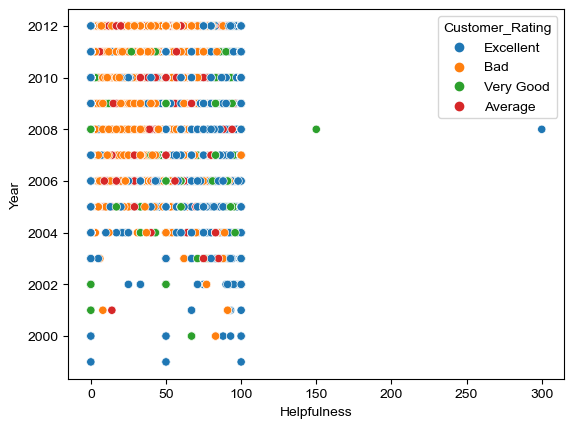

In [36]:
# Scatter plot of Helpfulness vs. Year
sns.scatterplot(data=data1, x="Helpfulness", y="Year", hue="Customer_Rating", color="#88c999")
sns.set_style("dark")
sns.set_palette("dark")
plt.show()


### Step 13.13: Plotting the Distribution of Scores

We will create a histogram and count plot to visualize the distribution of scores in the dataset.


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


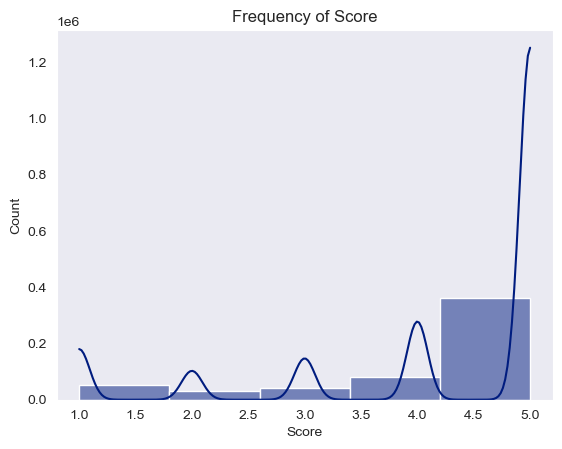

In [37]:
# Plot the distribution of scores
sns.histplot(data1["Score"], bins=5, kde=True)
plt.title("Frequency of Score")
plt.show()



### Step 13.14: Count plot for Scores

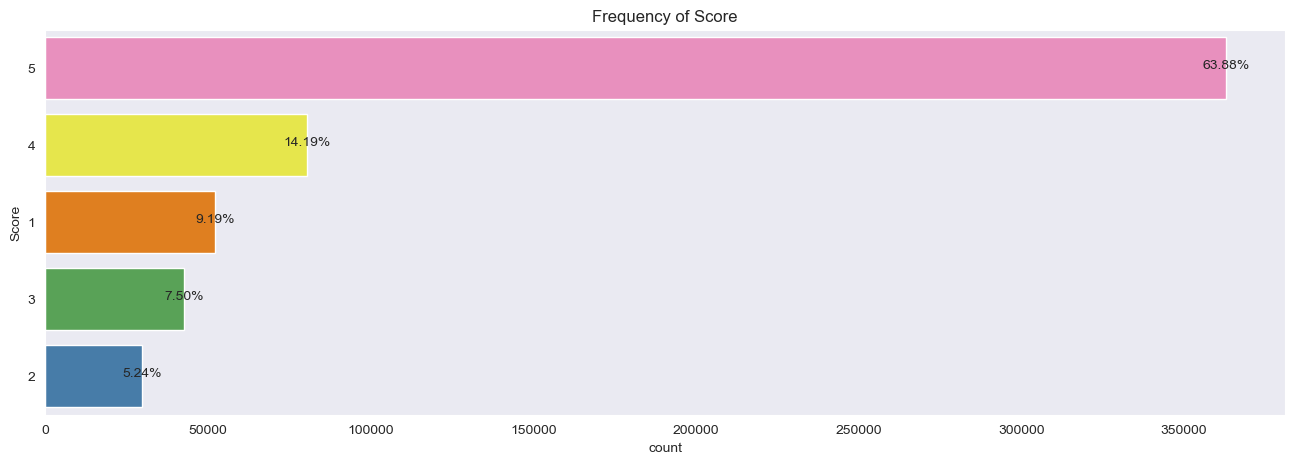

In [38]:
# Count plot for scores
fig = plt.figure(figsize=(16, 5))
order = data1["Score"].value_counts().index
ax = sns.countplot(y=data1["Score"], palette="Set1_r", order=order)
total = float(len(data1["Score"]))
for i, value in enumerate(data1["Score"].value_counts()):
    ax.text(value + 1, i, f"{(value/total)*100:.2f}%", ha="center")
plt.title("Frequency of Score")
plt.show()


### Step 13.15: Visualizing Distribution of Sales by Month

In this step, we will visualize the distribution of sales by month using a count plot. The count plot will show the frequency of sales records for each month and display the percentage of total sales for each month.


<Figure size 1100x600 with 0 Axes>

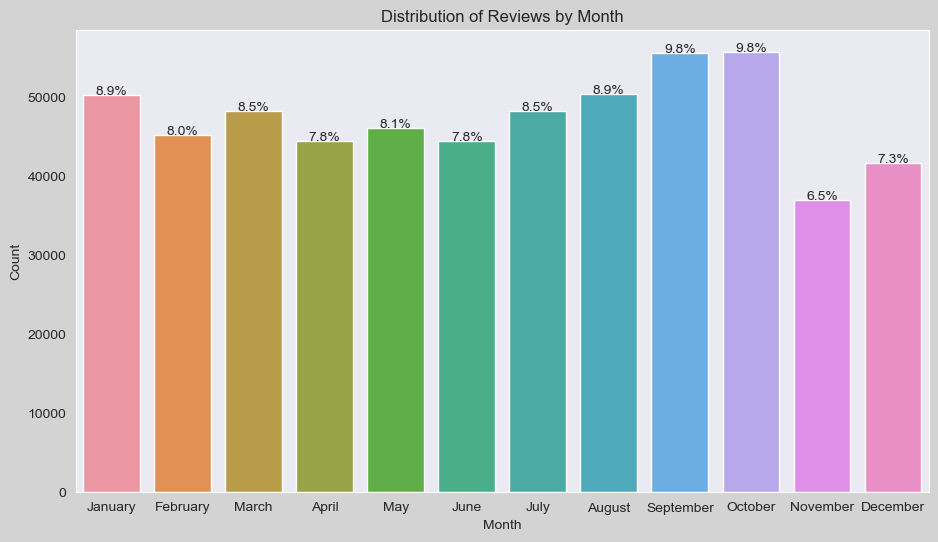

In [39]:
#Distribution of Sales by Month
plt.figure(figsize=(11, 6))
plt.figure(figsize=(11, 6), facecolor='lightgray')
ax = sns.countplot(data=data1, x="Month",order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
total = len(data1) # Total number of sales records
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 10, f"{percentage:.1f}%",ha="center")
plt.title("Distribution of Reviews by Month")
plt.xlabel("Month")
plt.ylabel("Count")
plt.show()


### Step 13.16: Visualizing Distribution of Sales by Year

Next, we will visualize the distribution of sales by year using a count plot. The count plot will show the frequency of sales records for each year and display the percentage of total sales for each year.


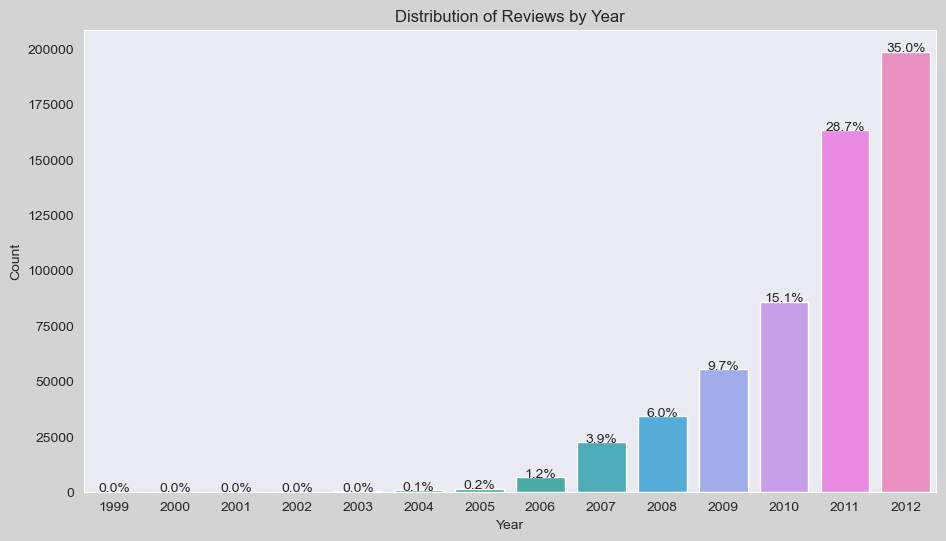

In [40]:
# Plot the count of reviews by year
plt.figure(figsize=(11, 6), facecolor='lightgray')
ax = sns.countplot(data=data1, x="Year")
total = len(data1)
for p in ax.patches:
    height = p.get_height()
    percentage = height / total * 100
    ax.text(p.get_x() + p.get_width() / 2, height + 10, f"{percentage:.1f}%", ha="center")
plt.title("Distribution of Reviews by Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


### Step 14: Finding Outliers

We will find outliers in the dataset using box plots.


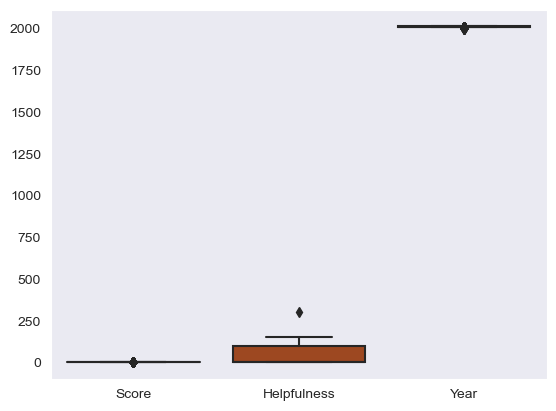

In [41]:
# Box plot for the entire dataset
sns.boxplot(data1)
plt.show()


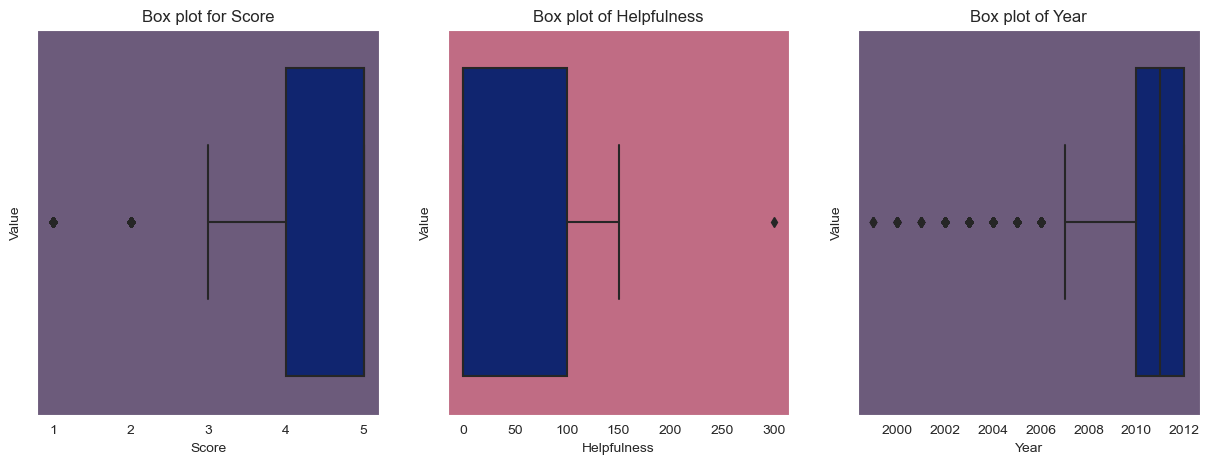

In [42]:
# Box plots for specific columns
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.boxplot(x=data1["Score"], ax=axes[0])
axes[0].set_title("Box plot for Score")
axes[0].set_xlabel("Score")
axes[0].set_ylabel("Value")
axes[0].set_facecolor("#6c5b7b")

sns.boxplot(x=data1["Helpfulness"], ax=axes[1])
axes[1].set_title("Box plot of Helpfulness")
axes[1].set_xlabel("Helpfulness")
axes[1].set_ylabel("Value")
axes[1].set_facecolor("#c06c84")

sns.boxplot(x=data1["Year"], ax=axes[2])
axes[2].set_title("Box plot of Year")
axes[2].set_xlabel("Year")
axes[2].set_ylabel("Value")
axes[2].set_facecolor("#6c5b7b")

plt.show()


### Step 14.3: Finding Outliers Based on Z-score

We will find outliers based on Z-score for the `Year` and `Helpfulness` columns.


In [43]:
# Outliers for Year
upper_limit=data1["Year"].mean()+3*data1["Year"].std()
lower_limit=data1["Year"].mean()-3*data1["Year"].std()
df_new=data1[(data1["Year"]<lower_limit)| (data1["Year"]>upper_limit)]
df_new



,ProductId,UserId,Profilename,Score,ReviewSummary,ReviewText,Helpfulness,Year,Month,Customer_Rating
10,B0001PB9FE,A3HDKO7OW0QNK4,Canadian Fan,5,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,100,2005,February,Excellent
29,B0001PB9FY,A3HDKO7OW0QNK4,Canadian Fan,5,The Best Hot Sauce in the World,I don't know if it's the cactus or the tequila...,100,2005,February,Excellent
1205,B005O072PC,A3BD5B8Y8MY25X,"J. L. K. ""special_k""",5,The best twice baked potatoes you'll ever have!,Perfect year round with just about any meat di...,93,2004,June,Excellent
1208,B005O072PC,A948FPTGYXYBO,C. Fiorelli,3,Actually pretty good,These are actually pretty good little potato p...,83,2004,December,Average
1243,B00002Z754,A3B8RCEI0FXFI6,B G Chase,5,WOW Make your own 'slickers' !,I just received my shipment and could hardly w...,100,2000,June,Excellent
...,...,...,...,...,...,...,...,...,...,...
566656,B0005ZXX1S,A2J1IOB9RY7J5C,Hubbit Ducreux,4,"Twinings is good Earl Grey, but...","...the tea did not originate with Twinings, bu...",17,2005,July,Very Good
566726,B000634EZS,A3U4GWFXO18FCZ,"Cynthia Baker ""pseudo intellectual""",4,Smells WONDERFUL,I had seen this cat litter at a kiosk at the P...,96,2004,December,Very Good
567012,B0009K9D22,A6GMEO3VRY51S,microjoe,5,memories,You get 24 bags in the case. I remember this v...,100,2005,June,Excellent
567317,B0000DNS4J,A25PNMNXMUO95V,winglesslight,1,The WORST. I THROW AWAY the whole bag.,This is the worst dried mango product. I taste...,89,2004,June,Bad


The year with outliers is not regarded an outlier, according to domain␣knowledge.

In [44]:
# Outliers for Helpfulness
upper_limit = data1["Helpfulness"].mean() + 3 * data1["Helpfulness"].std()
lower_limit = data1["Helpfulness"].mean() - 3 * data1["Helpfulness"].std()
df_new_helpfulness = data1[(data1["Helpfulness"] < lower_limit) | (data1["Helpfulness"] > upper_limit)]
df_new_helpfulness.head()



,ProductId,UserId,Profilename,Score,ReviewSummary,ReviewText,Helpfulness,Year,Month,Customer_Rating
64421,B000MIDROQ,A161DK06JJMCYF,"J. E. Stephens ""Jeanne""",5,Bought This for My Son at College,My son loves spaghetti so I didn't hesitate or...,300,2008,October,Excellent


We have one outlier which is found out with help of Z-score

### Step 14.4: Clipping Outliers

We will clip the values in the `Helpfulness` column to remove extreme outliers.


In [45]:
#cliping the value
data1["Helpfulness"]=data1["Helpfulness"].clip(lower=0,upper=100)
#done with outlier with cliping function

### Step 14.5: Checking for Outliers in the Score Column

We will check for outliers in the `Score` column.


In [46]:
upper_limit=data1["Score"].mean()+3*data1["Score"].std()
lower_limit=data1["Score"].mean()-3*data1["Score"].std()
df_sc=data1[(data1["Score"]<lower_limit)| (data1["Score"]>upper_limit)]
df_sc


,ProductId,UserId,Profilename,Score,ReviewSummary,ReviewText,Helpfulness,Year,Month,Customer_Rating


We did not find any outliers with help of z-score

### Step 15: Distribution of Helpfulness

We will plot the distribution of the `Helpfulness` column using a histogram with KDE (Kernel Density Estimate).


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


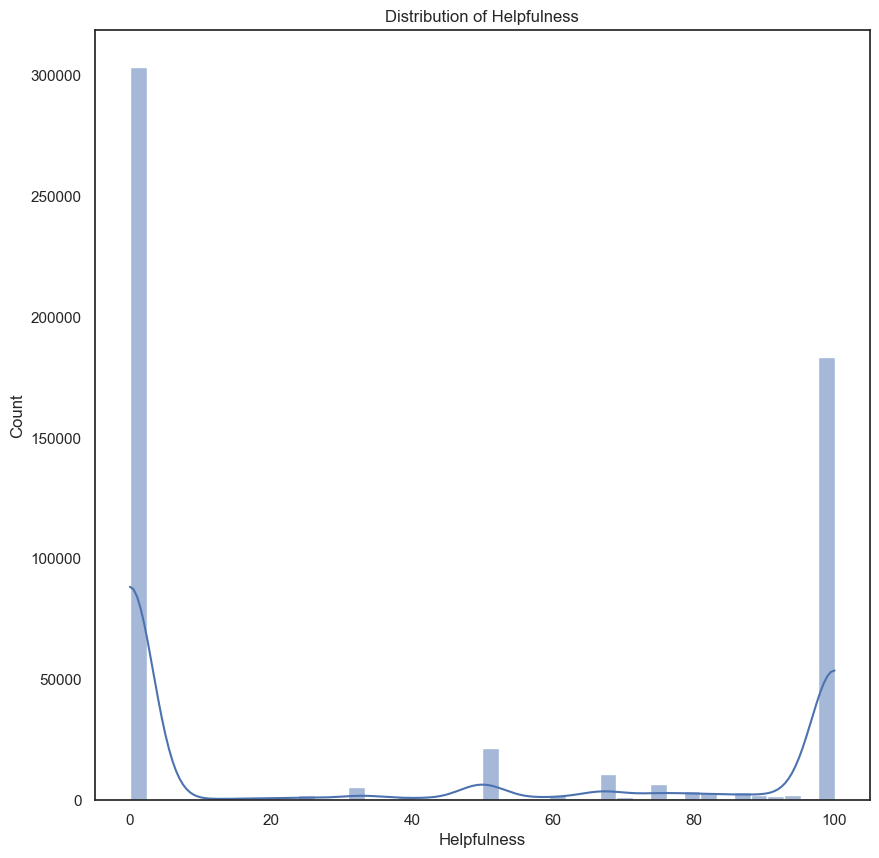

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set the background color
sns.set_style("whitegrid")
sns.set(style="white", color_codes=True)
# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(10, 10))
# Plot the histogram with KDE
sns.histplot(data=data1, x="Helpfulness", ax=ax, kde=True)
# Set labels and title
ax.set_xlabel("Helpfulness")
ax.set_ylabel("Count")
ax.set_title("Distribution of Helpfulness")
24
plt.show()

### Step 16: Correlation Matrix

We will calculate the correlation matrix for the numerical features and plot a heatmap.


In [48]:
# Select only the numerical features
numerical_features = data1.select_dtypes(include=['number'])

# Calculate the correlation matrix for numerical features
cr = numerical_features.corr()

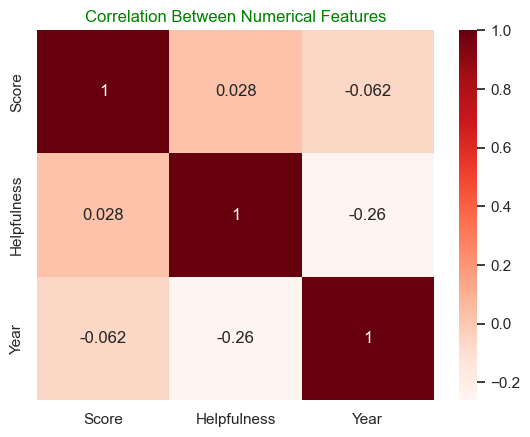

In [49]:
sns.heatmap(cr, cmap="Reds", annot=True, linecolor='black')
plt.title("Correlation Between Numerical Features", color="Green")
plt.show()


### Step 17: Pair Plot

We will create a pair plot for `Year` and `Helpfulness` with `Customer_Rating` as the hue.


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tu

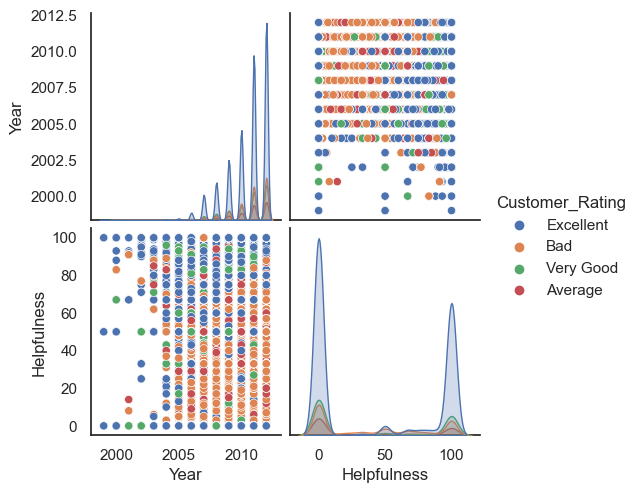

In [50]:
sns.pairplot(data=data1, vars=['Year', "Helpfulness"], hue='Customer_Rating')
plt.show()


# Step 18: Text Data Analysis

Analyze the length of the review texts.


### Step 18.1: Distribution of Review Length

We will plot the distribution of review length.


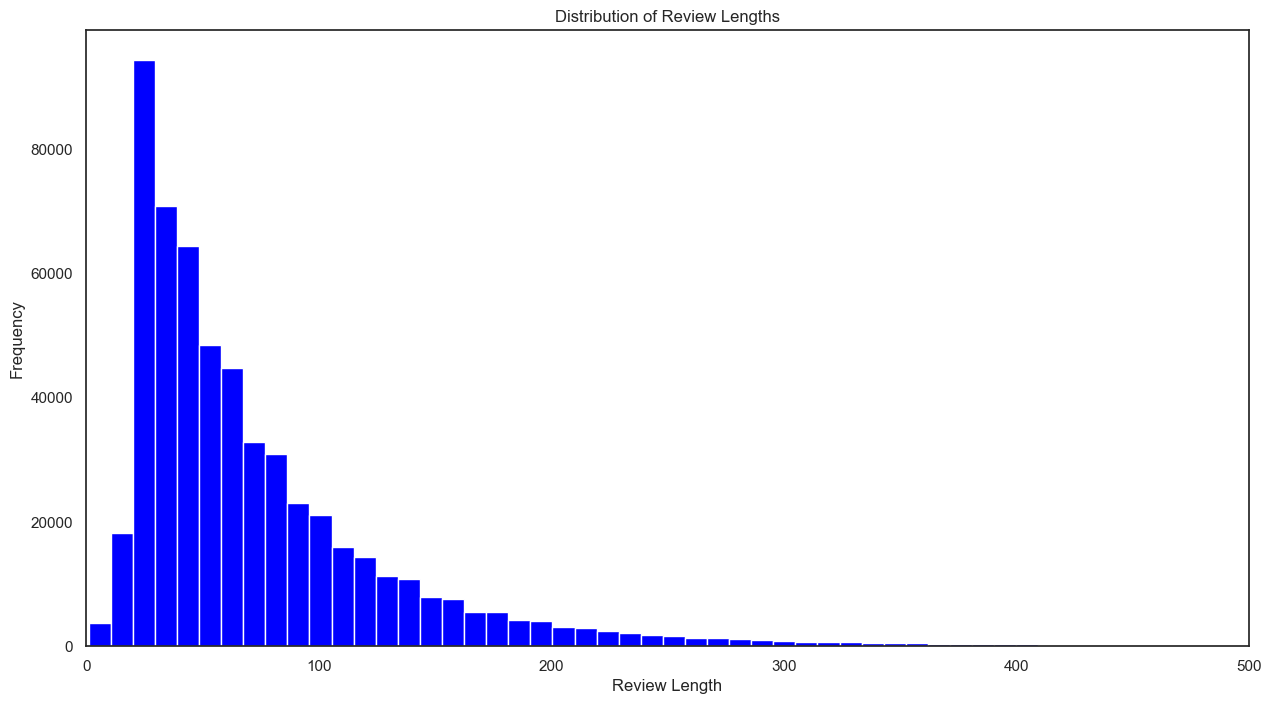

In [51]:
# Add a column for the length of each review
data1["ReviewLength"] = data1["ReviewText"].apply(lambda x: len(x.split()))

# Plot the distribution of review lengths
plt.figure(figsize=(15, 8))
plt.hist(data1["ReviewLength"], bins=200, color="blue")
plt.xlim(0, 500)
plt.xlabel("Review Length")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.show()


# Step 19: NLP Preprocessing

Perform basic NLP preprocessing: removing special characters, converting to lowercase, tokenizing, removing stop words, and lemmatization.


In [52]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

# Initialize stopwords and lemmatizer
stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Remove special characters
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize text
    tokens = text.split()
    # Remove stop words
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatize words
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)


# Apply preprocessing to the review texts
data1["CleanedReviewText"] = data1["ReviewText"].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Owner\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [53]:
# Display the cleaned data
data1.head()

,ProductId,UserId,Profilename,Score,ReviewSummary,ReviewText,Helpfulness,Year,Month,Customer_Rating,ReviewLength,CleanedReviewText
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,5,Good Quality Dog Food,I have bought several of the Vitality canned d...,100,2011,April,Excellent,48,bought several vitality canned dog food produc...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,0,2012,September,Bad,31,product arrived labeled jumbo salted peanutsth...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",4,"""Delight"" says it all",This is a confection that has been around a fe...,100,2008,August,Very Good,94,confection around century light pillowy citrus...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,2,Cough Medicine,If you are looking for the secret ingredient i...,100,2011,June,Bad,41,looking secret ingredient robitussin believe f...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",5,Great taffy,Great taffy at a great price. There was a wid...,0,2012,October,Excellent,27,great taffy great price wide assortment yummy ...


# Step 20: Save Cleaned Data

Save the cleaned and processed data to a new CSV file.


In [54]:
# Define the output CSV file path
output_cleaned_csv_path = os.path.join(directory_path, "cleaned_finefoods_reviews.csv")

# Save the cleaned DataFrame to a CSV file
data1.to_csv(output_cleaned_csv_path, index=False)

print(f"Cleaned DataFrame saved as CSV to {output_cleaned_csv_path}")


Cleaned DataFrame saved as CSV to D:\Final Project\cleaned_finefoods_reviews.csv


# Step 21: Word Cloud Visualization

Generate word clouds to visualize the most common words in positive and negative reviews.


In [55]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


### Step 21.1: Generating Word Cloud for Sample Reviews

We will generate a word cloud for the first three reviews to visualize the most frequent words.


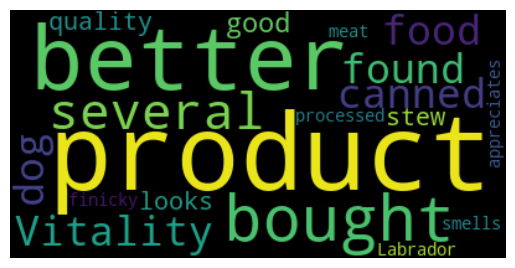

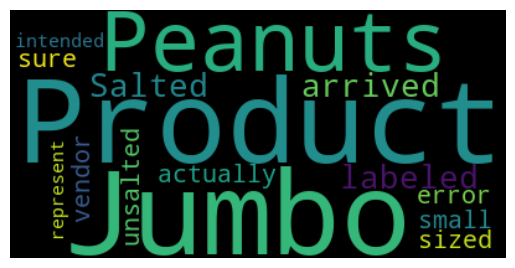

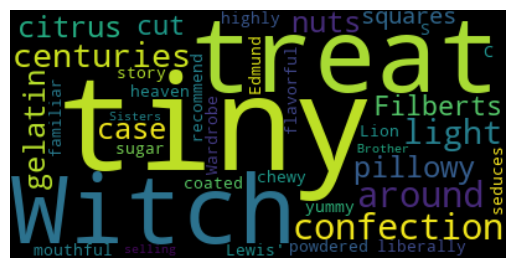

In [56]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for i in data1["ReviewText"][0:3]:
    wordcloud = WordCloud().generate(i)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


### Step 21.2: Generating Word Cloud for Positive Reviews

We will create a word cloud for reviews with scores of 4 and 5 to see the most frequent words.


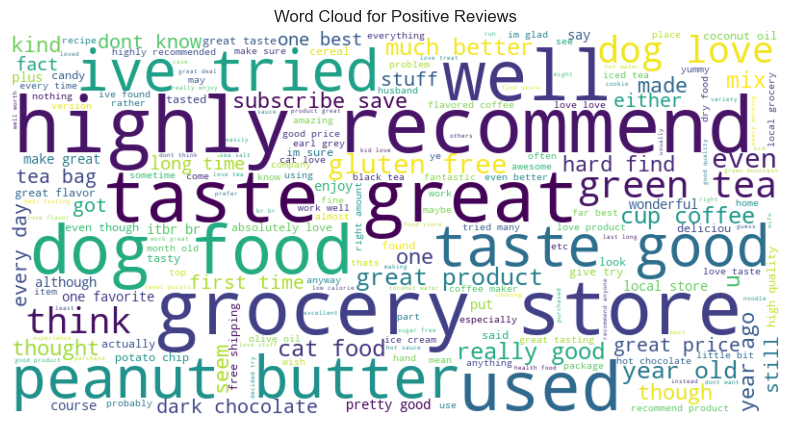

In [57]:
# Generate word clouds for positive reviews
positive_reviews = data1[data1["Score"] >= 4]["CleanedReviewText"].str.cat(sep=' ')

# Word cloud for positive reviews
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Positive Reviews")
plt.show()




### Step 21.3: Generating Word Cloud for Negative Reviews

We will create a word cloud for reviews with scores less than 2 to visualize the most frequent words.


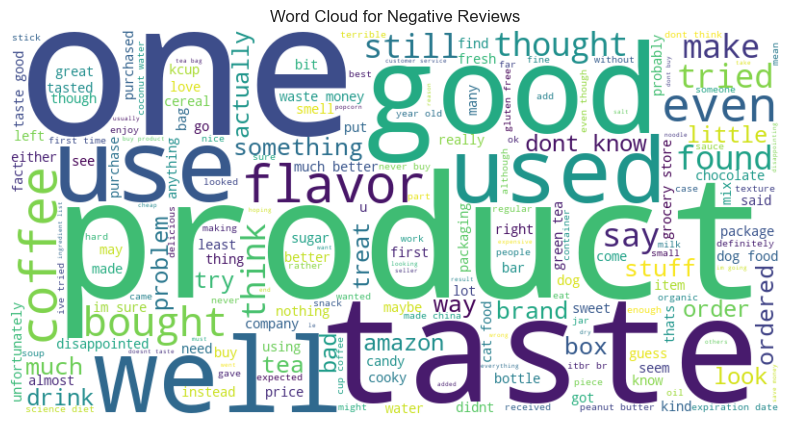

In [58]:
# Generate word clouds for negative reviews
negative_reviews = data1[data1["Score"] <= 2]["CleanedReviewText"].str.cat(sep=' ')

# Word cloud for negative reviews
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud for Negative Reviews")
plt.show()

### Step 21.4: Generating Word Cloud for All Reviews

We will create a word cloud for all reviews to visualize the most frequent words across the entire dataset.


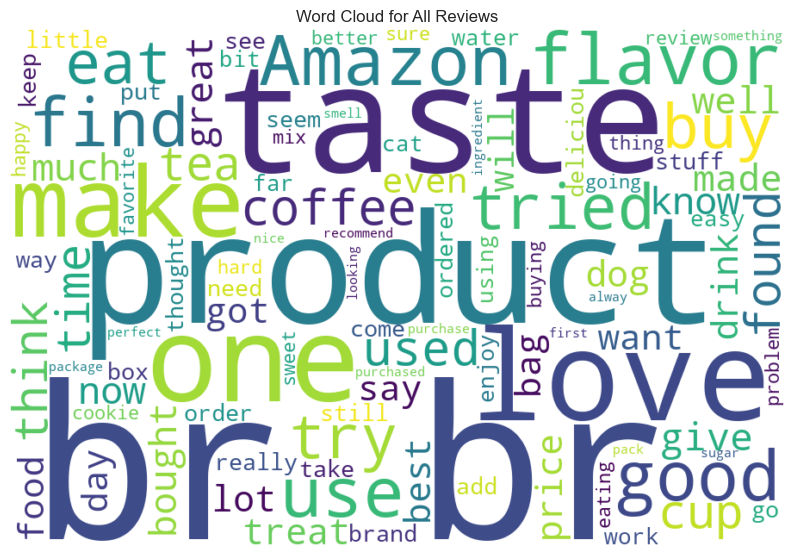

In [59]:
text = " ".join(data1["ReviewText"])
word_cloud = WordCloud(width=900, height=600, max_words=100, background_color='white').generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for All Reviews")
plt.show()


# Step 22: Model Building

Build machine learning models to predict the review scores based on the review text.


In [60]:
import time
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data1['CleanedReviewText'], data1['Score'], test_size=0.3, random_state=42)

# Vectorize the text data using TF-IDF
tfidf = TfidfVectorizer()
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


# Step 23: Logistic Regression

Train and evaluate a logistic regression model.


In [61]:
import time
# Track the start time
start_time = time.time()

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=100)
log_reg.fit(X_train_tfidf, y_train)

D:\Anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [62]:
# Predict on the test data
y_pred_log_reg = log_reg.predict(X_test_tfidf)

# Track the end time
end_time = time.time()
training_time = end_time - start_time

In [63]:
# Evaluate the model
log_reg_acc = accuracy_score(y_test, y_pred_log_reg)
log_reg_prec = precision_score(y_test, y_pred_log_reg, average='weighted')
log_reg_rec = recall_score(y_test, y_pred_log_reg, average='weighted')
log_reg_f1 = f1_score(y_test, y_pred_log_reg, average='weighted')

In [64]:
print(f"Logistic Regression - Accuracy: {log_reg_acc:.4f}, Precision: {log_reg_prec:.4f}, Recall: {log_reg_rec:.4f}, F1 Score: {log_reg_f1:.4f}")
print(f"Training Time: {training_time:.2f} seconds")

Logistic Regression - Accuracy: 0.7382, Precision: 0.7005, Recall: 0.7382, F1 Score: 0.7047
Training Time: 55.32 seconds


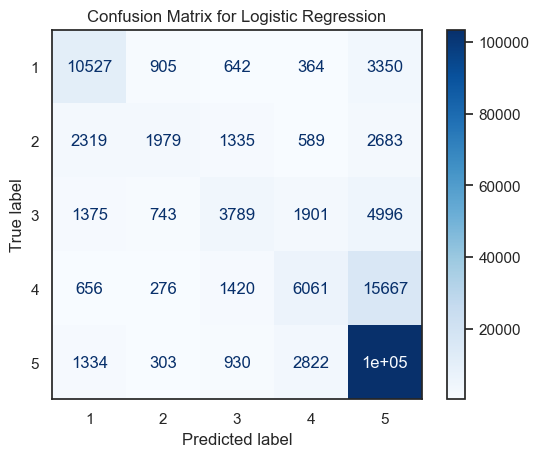

In [65]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred_log_reg, labels=log_reg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [66]:
# Create DataFrame for actual vs predicted values
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_log_reg})
actual_vs_predicted.head()

,Actual,Predicted
504379,3,3
408706,1,1
21939,3,5
254156,5,5
376139,5,5


# Step 24: Naive Bayes

Train and evaluate a Naive Bayes model.
`

In [67]:
# Track the start time
start_time = time.time()

# Train the Naive Bayes model
naive_bayes = MultinomialNB()
naive_bayes.fit(X_train_tfidf, y_train)




MultinomialNB()

In [68]:
# Predict on the test data
y_pred_naive_bayes = naive_bayes.predict(X_test_tfidf)


# Track the end time
end_time = time.time()
training_time = end_time - start_time



In [69]:
# Evaluate the model
naive_bayes_acc = accuracy_score(y_test, y_pred_naive_bayes)
naive_bayes_prec = precision_score(y_test, y_pred_naive_bayes, average='weighted')
naive_bayes_rec = recall_score(y_test, y_pred_naive_bayes, average='weighted')
naive_bayes_f1 = f1_score(y_test, y_pred_naive_bayes, average='weighted')



In [70]:
print(f"Naive Bayes - Accuracy: {naive_bayes_acc:.4f}, Precision: {naive_bayes_prec:.4f}, Recall: {naive_bayes_rec:.4f}, F1 Score: {naive_bayes_f1:.4f}")
print(f"Training Time: {training_time:.2f} seconds")

Naive Bayes - Accuracy: 0.6446, Precision: 0.7425, Recall: 0.6446, F1 Score: 0.5114
Training Time: 0.35 seconds


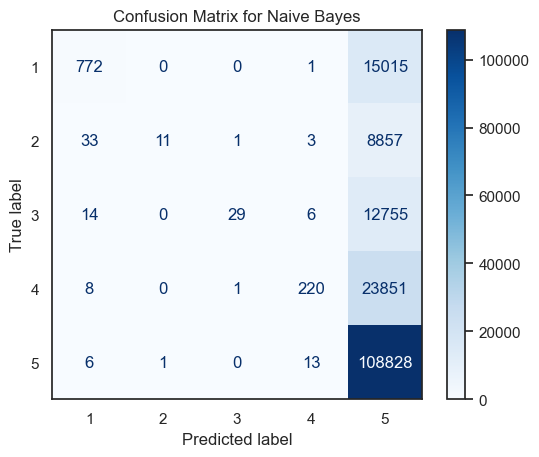

In [71]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred_naive_bayes, labels=naive_bayes.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_bayes.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Naive Bayes")
plt.show()

In [72]:
# Create DataFrame for actual vs predicted values
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_naive_bayes})
actual_vs_predicted.head()

,Actual,Predicted
504379,3,5
408706,1,5
21939,3,5
254156,5,5
376139,5,5


# Step 25: Random Forest

Train and evaluate a Random Forest model.


In [73]:
# Track the start time
start_time = time.time()

# Train the Random Forest model
random_forest = RandomForestClassifier(n_estimators=1, random_state=42)
random_forest.fit(X_train_tfidf, y_train)



RandomForestClassifier(n_estimators=1, random_state=42)

In [74]:
# Predict on the test data
y_pred_random_forest = random_forest.predict(X_test_tfidf)

# Track the end time
end_time = time.time()
training_time = end_time - start_time

In [75]:
# Evaluate the model
random_forest_acc = accuracy_score(y_test, y_pred_random_forest)
random_forest_prec = precision_score(y_test, y_pred_random_forest, average='weighted')
random_forest_rec = recall_score(y_test, y_pred_random_forest, average='weighted')
random_forest_f1 = f1_score(y_test, y_pred_random_forest, average='weighted')

In [76]:
print(f"Random Forest - Accuracy: {random_forest_acc:.4f}, Precision: {random_forest_prec:.4f}, Recall: {random_forest_rec:.4f}, F1 Score: {random_forest_f1:.4f}")
print(f"Training Time: {training_time:.2f} seconds")

Random Forest - Accuracy: 0.6879, Precision: 0.6788, Recall: 0.6879, F1 Score: 0.6829
Training Time: 213.20 seconds


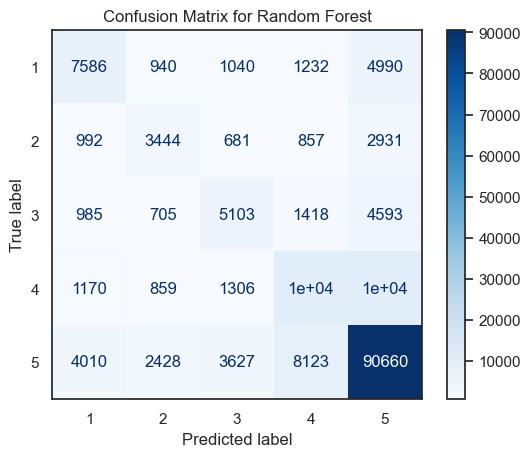

In [77]:
# Display confusion matrix
cm = confusion_matrix(y_test, y_pred_random_forest, labels=random_forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=random_forest.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [78]:
# Create DataFrame for actual vs predicted values
actual_vs_predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_random_forest})
actual_vs_predicted.head()

,Actual,Predicted
504379,3,3
408706,1,5
21939,3,3
254156,5,5
376139,5,5


# Step 26: Model Comparison

Compare the performance of different models.


In [79]:
# Create a DataFrame to store the results
model_comparison = pd.DataFrame({
    "Model": ["Logistic Regression", "Naive Bayes", "Random Forest"],
    "Accuracy": [log_reg_acc, naive_bayes_acc, random_forest_acc],
    "Precision": [log_reg_prec, naive_bayes_prec, random_forest_prec],
    "Recall": [log_reg_rec, naive_bayes_rec, random_forest_rec],
    "F1 Score": [log_reg_f1, naive_bayes_f1, random_forest_f1]
})

# Display the comparison
model_comparison


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.738243,0.700467,0.738243,0.704706
1,Naive Bayes,0.644624,0.742496,0.644624,0.511403
2,Random Forest,0.687863,0.678823,0.687863,0.682864


# Step 27: Advanced Visualization

Visualize the model performance using advanced plots.


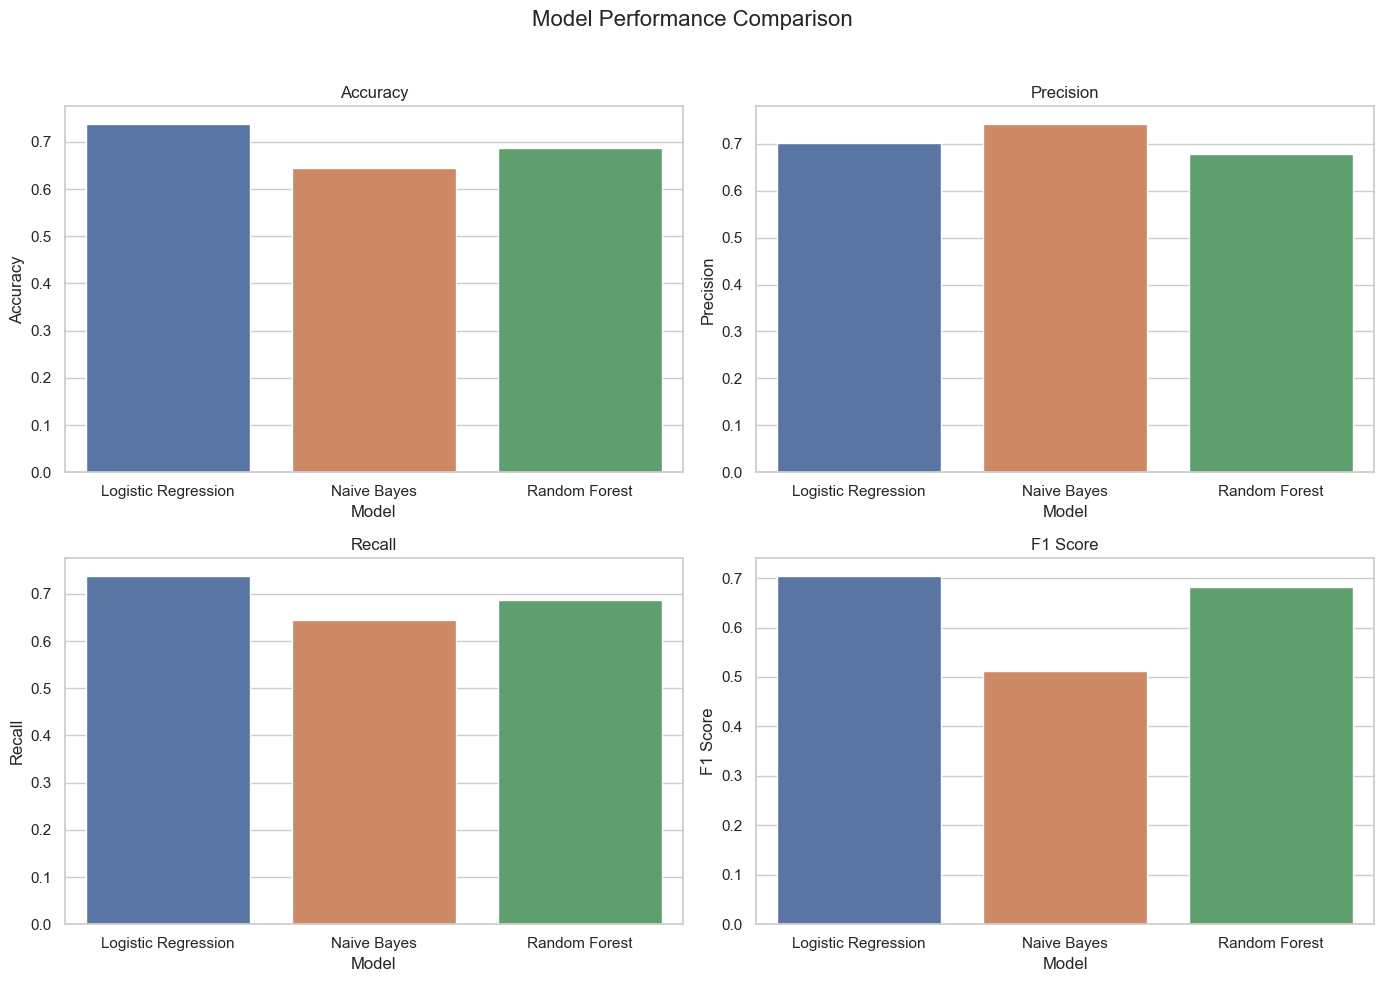

In [80]:
# Import necessary libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Function to plot model performance
def plot_model_performance(model_comparison):
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('Model Performance Comparison', fontsize=16)

    sns.barplot(x="Model", y="Accuracy", data=model_comparison, ax=axes[0, 0])
    axes[0, 0].set_title('Accuracy')

    sns.barplot(x="Model", y="Precision", data=model_comparison, ax=axes[0, 1])
    axes[0, 1].set_title('Precision')

    sns.barplot(x="Model", y="Recall", data=model_comparison, ax=axes[1, 0])
    axes[1, 0].set_title('Recall')

    sns.barplot(x="Model", y="F1 Score", data=model_comparison, ax=axes[1, 1])
    axes[1, 1].set_title('F1 Score')

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

# Plot model performance
plot_model_performance(model_comparison)


# Conclusion

This notebook provided an in-depth analysis of the Amazon Fine Foods Reviews dataset. The key steps included:

1. **Data Loading and Initial Inspection**:
    - Loaded and inspected the dataset to understand its structure.

2. **Data Cleaning and Preprocessing**:
    - Cleaned the data, converted columns to appropriate types, and extracted year and month from timestamps.
    - Calculated helpfulness percentages and created customer rating categories.

3. **Exploratory Data Analysis (EDA)**:
    - Conducted EDA to uncover patterns using visualizations for scores, review counts, and helpfulness metrics.
    - Identified and handled outliers.

4. **Text Analysis**:
    - Analyzed review text lengths and performed NLP preprocessing.
    - Generated word clouds for positive and negative reviews.

5. **Machine Learning Model Building**:
    - Built and evaluated Logistic Regression, Naive Bayes, and Random Forest models to predict review scores.
    - Assessed models using accuracy, precision, recall, and F1 score metrics.

6. **Model Comparison and Visualization**:
    - Compared model performance and visualized results using bar plots.

The analysis provided valuable insights into customer feedback and demonstrated effective use of machine learning for text data prediction.
